# Working with Projections

This section of the tutorial discusses [map projections](https://en.wikipedia.org/wiki/Map_projection). If you don't know what a projection is, or are looking to learn more about how they work in `geoplot`, this page is for you!

I recommend reading this notebook using [NBViewer](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Working_with_Projections.ipynb) or, better yet, following along interactively using [Binder](https://mybinder.org/v2/gh/ResidentMario/geoplot/master?filepath=notebooks/tutorials/Working_with_Projections.ipynb).

## Projection and unprojection

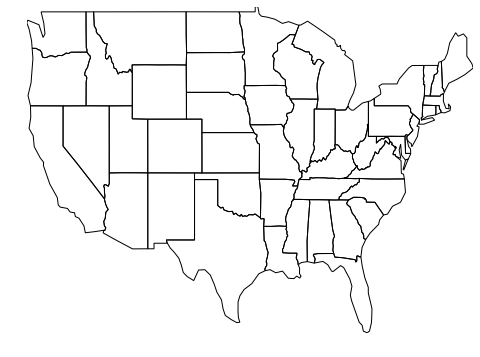

In [2]:
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

# load the example data
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

This map is an example of an unprojected plot: it reproduces our coordinates as if they were on a flat Cartesian plane. But remember, the Earth is not a flat surface; it's a sphere. This isn't a map of the United States that you'd seen in print anywhere because it badly distorts both of the [two criteria](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/How%20to%20choose%20a%20projection.htm) most projections are evaluated on: *shape* and *area*. 

For sufficiently small areas, the amount of distortion is very small. This map of New York City, for example, is reasonably accurate:

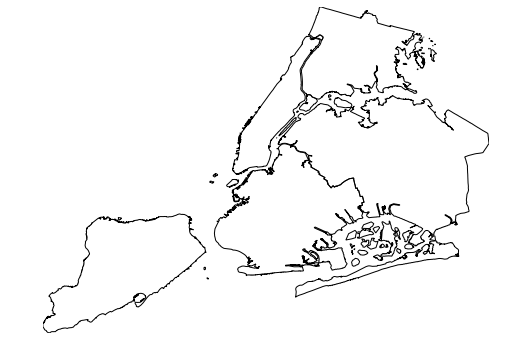

In [7]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
gplt.polyplot(boroughs)

But there is a better way: use a **projection**.

A projection is a way of mapping points on the surface of the Earth into two dimensions (like a piece of paper or a computer screen). Because moving from three dimensions to two is intrinsically lossy, no projection is perfect, but some will definitely work better in certain case than others.

The most common projection used for the contiguous United States is the [Albers Equal Area projection](https://en.wikipedia.org/wiki/Albers_projection). This projection works by wrapping the Earth around a cone, one that's particularly well optimized for locations near the middle of the Northern Hemisphere (and particularly poorly for locations at the poles).

To add a projection to a map in `geoplot`, pass a `geoplot.crs` object to the `projection` parameter on the plot. For instance, here's what we get when we try `Albers` out on the contiguous United States:

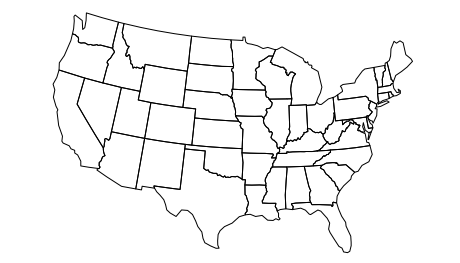

In [3]:
import geoplot.crs as gcrs
gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

You may notice that this figure is very slightly skewed. That's because `geoplot` had to "guess" the right coordinates for the plot. If this happens to you. It generally does a pretty good job, but you can optimize slightly by providing your own centerpoint: 

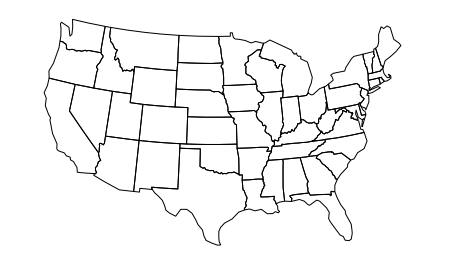

In [5]:
gplt.polyplot(
    contiguous_usa, 
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
)

Refer to [this page](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) to see the list of projections that ``geoplot`` implements.

**Note**: in the future `geoplot` will have its own reference page on the projections it supports.

One cautionary note. If you ask for an unprojected plot, `geoplot` will return a `matplotlib` `AxesSubplot` object. If you ask for a projected plot, `geoplot` will instead return a `cartopy` `GeoAxesSubplot` object.

`cartopy` is a `matplotlib` extension library which `geoplot` relies on for implementing the coordinate transformations required. A `GeoAxesSuplot` is a subclass of `AxesSubplot`, and so it will have all of the usual `matplotlib` operations defined on it. However, it is incompatible with certain *other* libraries, e.g. `mplleaflet`, which expect pure `matplotlib` objects. For these use cases, omit the projection.